# Chapter 3 - notebook level 1

## Save NLIW event data in ENU coordinates

In [1]:
import os
import numpy as np
import xarray as xr
import seaborn as sns
import cmocean as cm
# import natsort
# import glob
# from d2spike.despike import DataArray
from wootils.plotnice import vert_stack, basic_ts#, saveclose
# from pIMOS.utils.nortek_signature_utils import beam2inst, inst2earth

import sys
sys.path.insert(0, '../../')
# from chp3_despike import full_pipe
# from chp3_basefuncs import get_sigfiles
from chp3_fluxfuncs import get_nliw_times

sns.set()
sns.set_theme(style="white")
sns.set_style("ticks")

import warnings
warnings.filterwarnings("ignore")

In [2]:
moor = 'L150'
# field_trip = 'rs19'

## Specify the events

In [3]:
wav_tx = get_nliw_times()

In [4]:
# Set key data directories
nc_dir = r'/mnt/c/Users/00099894/Large_Data/RS2019'
nc_file = os.path.join(nc_dir, '[RS2019]_[RS19_REC]_[T150]_[550]_[RDI 150 kHz Quartermaster]_[11795]_[no_outfile_append].nc')
ds = xr.open_dataset(nc_file)
ds.close()

t_bef = np.timedelta64(0,'m')
t_aft = np.timedelta64(40,'m')

save_dir = r'/mnt/c/Users/00099894/Large_Data/RS2019'
save_dir = os.path.join(save_dir, 'nliw')

In [5]:
ds

<xarray.Dataset>
Dimensions:             (distance: 73, time: 47111, beam: 4)
Coordinates:
  * distance            (distance) float64 6.41 8.41 10.41 ... 146.4 148.4 150.4
  * time                (time) datetime64[ns] 2019-03-05 ... 2019-04-06T17:09...
  * beam                (beam) int32 1 2 3 4
    lat_nom             float64 ...
    lon_nom             float64 ...
    z_nom               float64 ...
    prof_z_nom          (distance) float64 ...
Data variables: (12/21)
    beamvel             (distance, time, beam) float32 ...
    percent_good        (distance, time, beam) uint8 ...
    echo                (distance, time, beam) uint8 ...
    corr                (distance, time, beam) uint8 ...
    pressure            (time) float32 ...
    temperature         (time) float32 ...
    ...                  ...
    vinst               (distance, time) float64 ...
    winst               (distance, time) float64 ...
    errvel              (distance, time) float64 ...
    qc_velocity         (distance, time) float64 ...
    sidelobe_last_good  (time) float32 ...
    sidelobe_blank      (distance, time) bool ...
Attributes: (12/34)
    title:                           Measured data from a TDRI ADCP
    institution:                     The University of Western Australia
    institution_division:            Ocean Dynamics
    source:                          pIMOS
    project:                         RS2019
    history:                         
    ...                              ...
    pressure_sensor_height_asb:      
    nominal_instrument_height_asb:   5.5
    nominal_instrument_orientation:  up
    timezone:                        UTC
    process_level:                   
    is_profile_data:                 0

0
Saved successfully
1
Saved successfully
2
Saved successfully
3
Saved successfully
4
Saved successfully
5
Saved successfully
6
Saved successfully
7
Saved successfully
8
Saved successfully
9
Saved successfully
10
Saved successfully


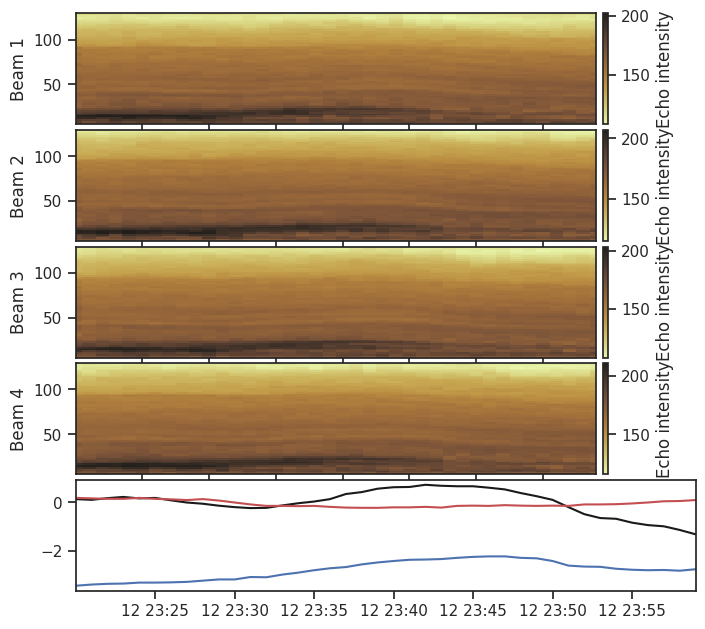

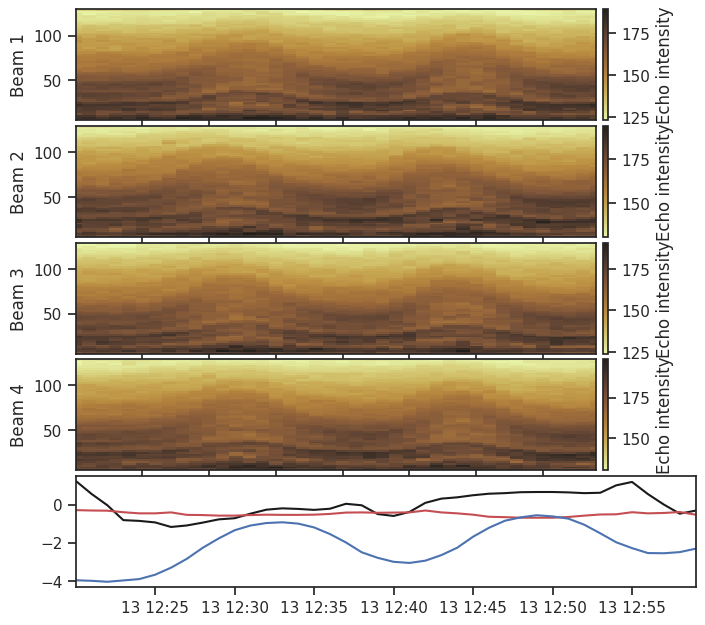

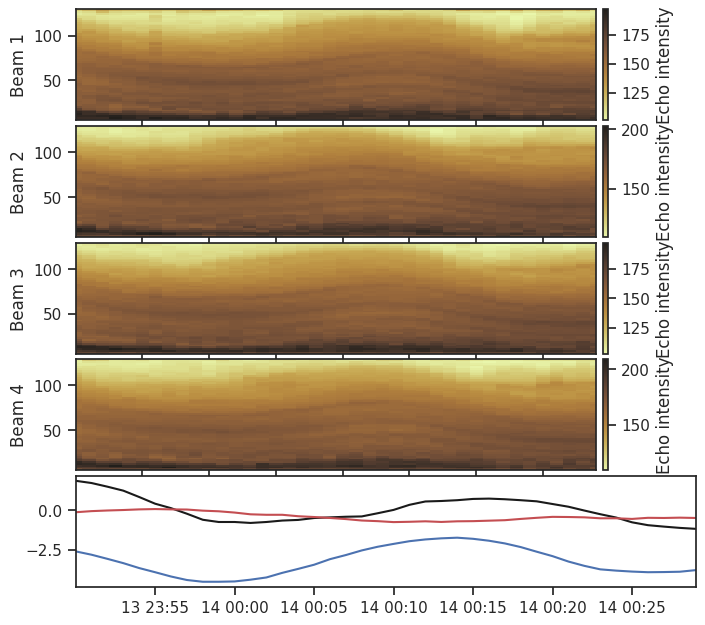

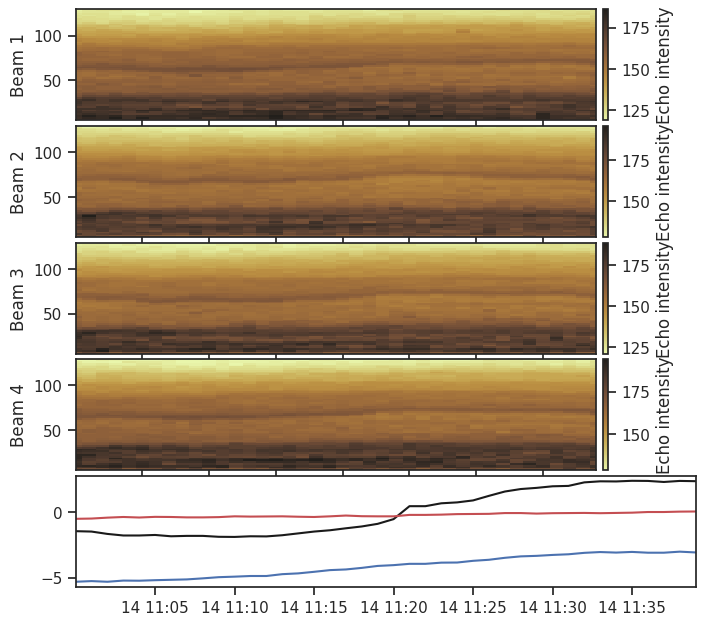

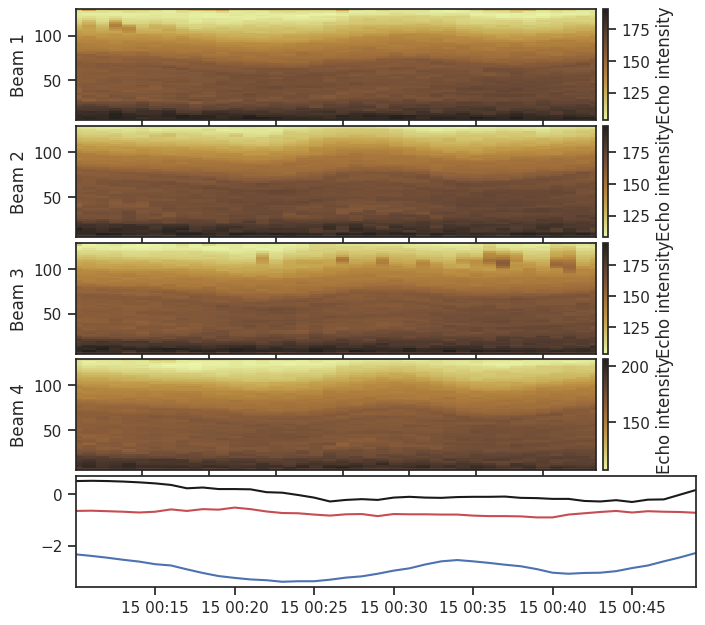

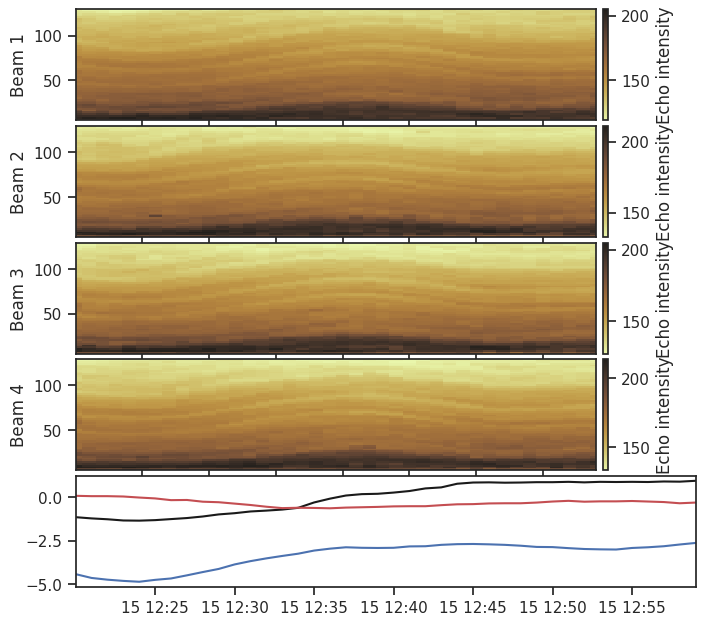

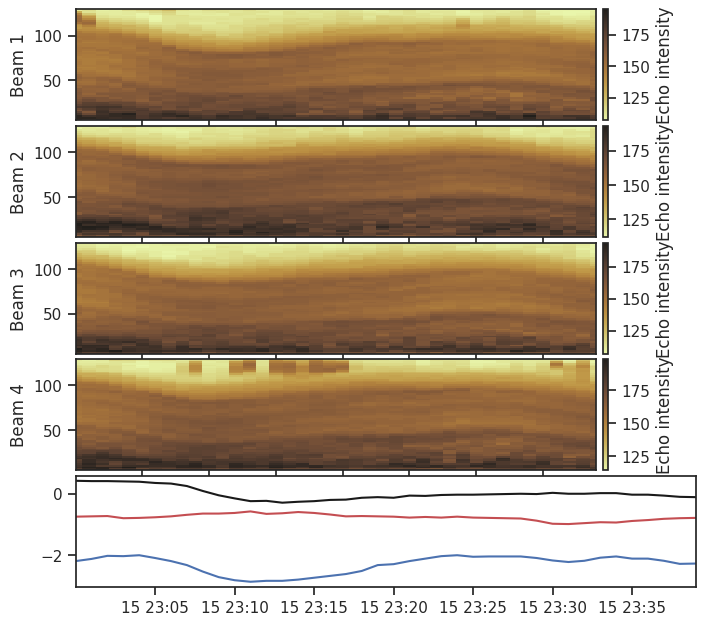

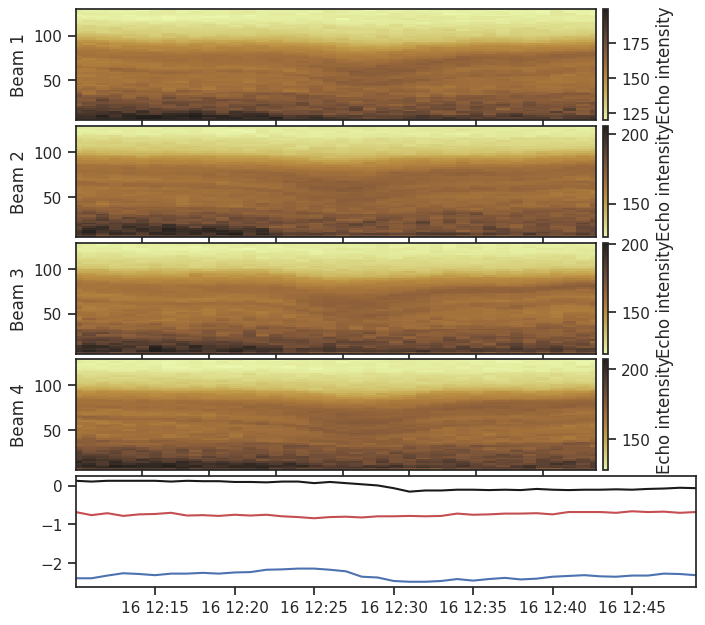

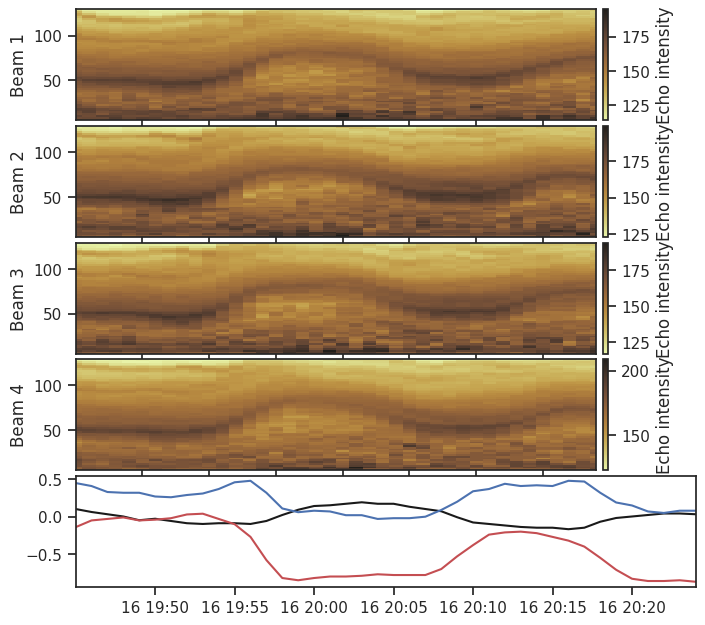

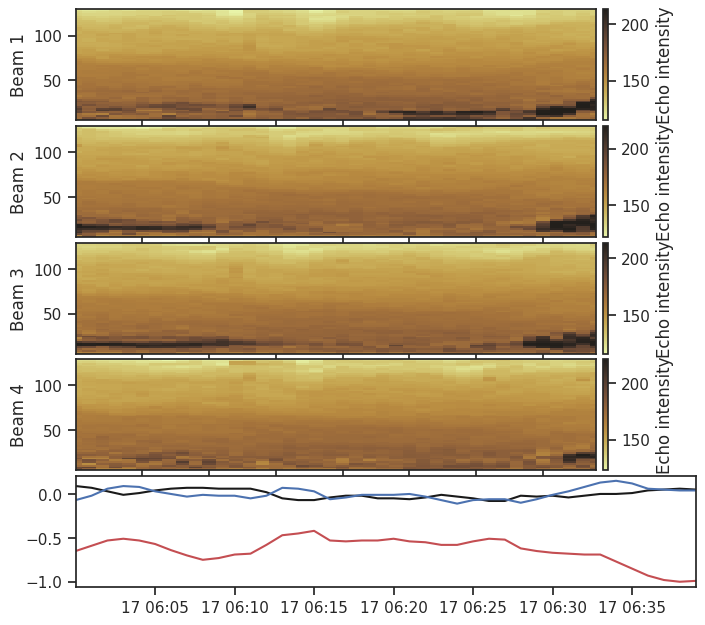

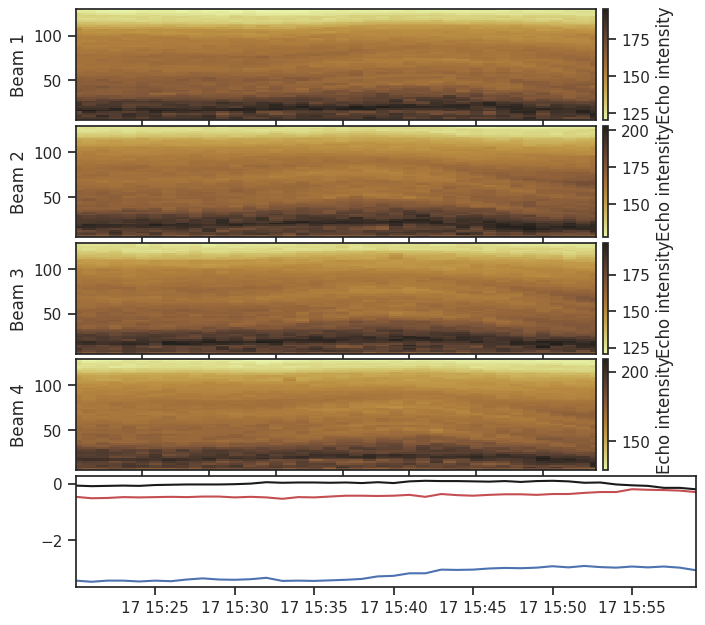

In [6]:
# Loop through files
for ixll, wave in enumerate(wav_tx):
    print(ixll)
    if ixll>-1:

        ds_crop = ds.sel(time=slice(wave-t_bef, wave+t_aft), distance=slice(0,130))

        # # Save a figure with all 4 beams
        fig, ax = vert_stack(5)
        for i in range(len(ds.beam)):
            ds_crop['echo'].sel(beam=i+1).plot(ax=ax[i], cmap=cm.cm.turbid, cbar_kwargs={'pad':0.01})
            ax[i].set_ylabel('Beam ' + str(i+1))
        ax[-1].plot(ds_crop.time.values, ds_crop['heading'].values - np.mean(ds_crop.heading.values), 'k')
        ax[-1].plot(ds_crop.time.values, ds_crop['pitch'].values, 'r')
        ax[-1].plot(ds_crop.time.values, ds_crop['roll'].values, 'b')
        basic_ts(ds_crop.time.values, ax)
        # saveclose(os.path.join(fig_dir, f"Event_{iii+1}_beams"), fig)

        # Save as netcdf
        ds_crop.to_netcdf(path=os.path.join(save_dir, 'NLIW_' + str(ixll+1) + '_ADCP.nc'))
        ds_crop.attrs['heading'] = ds['heading'].values
        ds_crop.attrs['pitch'] = ds['pitch'].values
        ds_crop.attrs['roll'] = ds['roll'].values
        print('Saved successfully')